<a href="https://colab.research.google.com/github/castrigno22/geopandas/blob/main/EsercitazioneGeopandas7_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.6 MB/s 
     |████████████████████████████████| 15.4 MB 47.4 MB/s 
     |████████████████████████████████| 6.3 MB 56.9 MB/s 


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 415 kB/s 


In [ ]:
%matplotlib inline
import contextily
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
corsi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione.zip")

In [ ]:
com = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g-20220120T125637Z-001/Limiti01012021_g/Com01012021_g")

In [ ]:
prov = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g-20220120T125637Z-001/Limiti01012021_g/ProvCM01012021_g")

In [ ]:
mi = prov[prov["DEN_UTS"] == "Milano"]
mi

In [ ]:
corsiMi = corsi[corsi.within(mi.geometry.squeeze())]
maxCorsi = corsi.nlargest(10, "SHAPE_LEN")
maxCorsi

OBJECTID  ...                                           geometry
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...

[10 rows x 31 columns]

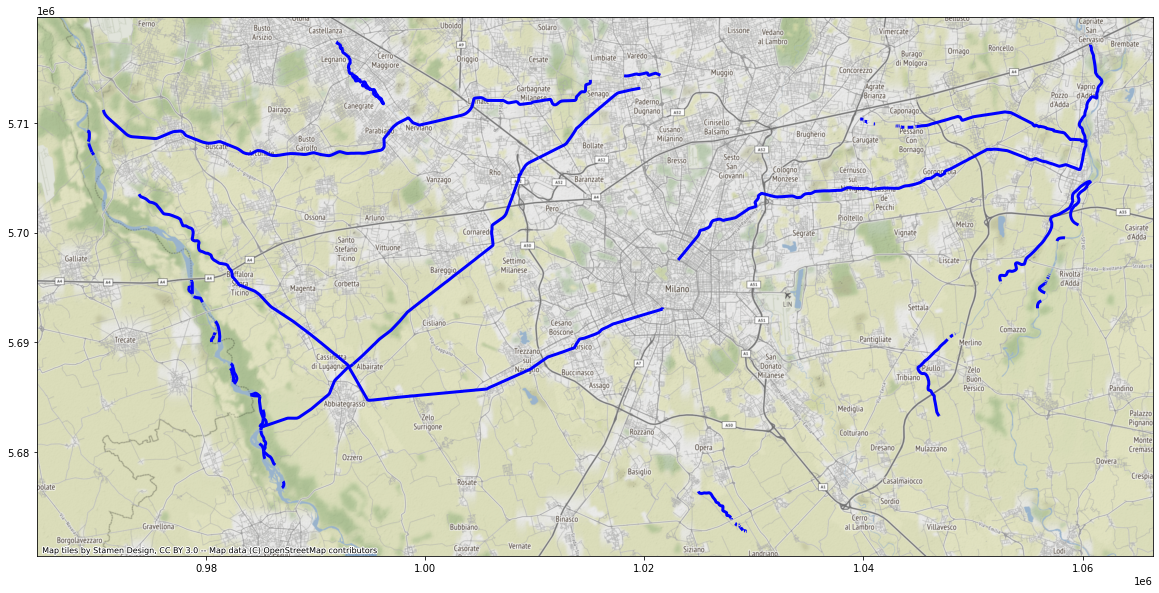

In [ ]:
ax = maxCorsi.to_crs(epsg=3857).plot(figsize= (20, 20), edgecolor="b", linewidth=3)
contextily.add_basemap(ax=ax)

In [ ]:
navigli = corsi[corsi["NOME"].str.contains("Navigl")]
fiu = corsi[corsi.intersects(navigli.geometry.squeeze().unary_union)]
fiu = fiu[~fiu["NOME"].str.contains("Navigl")]

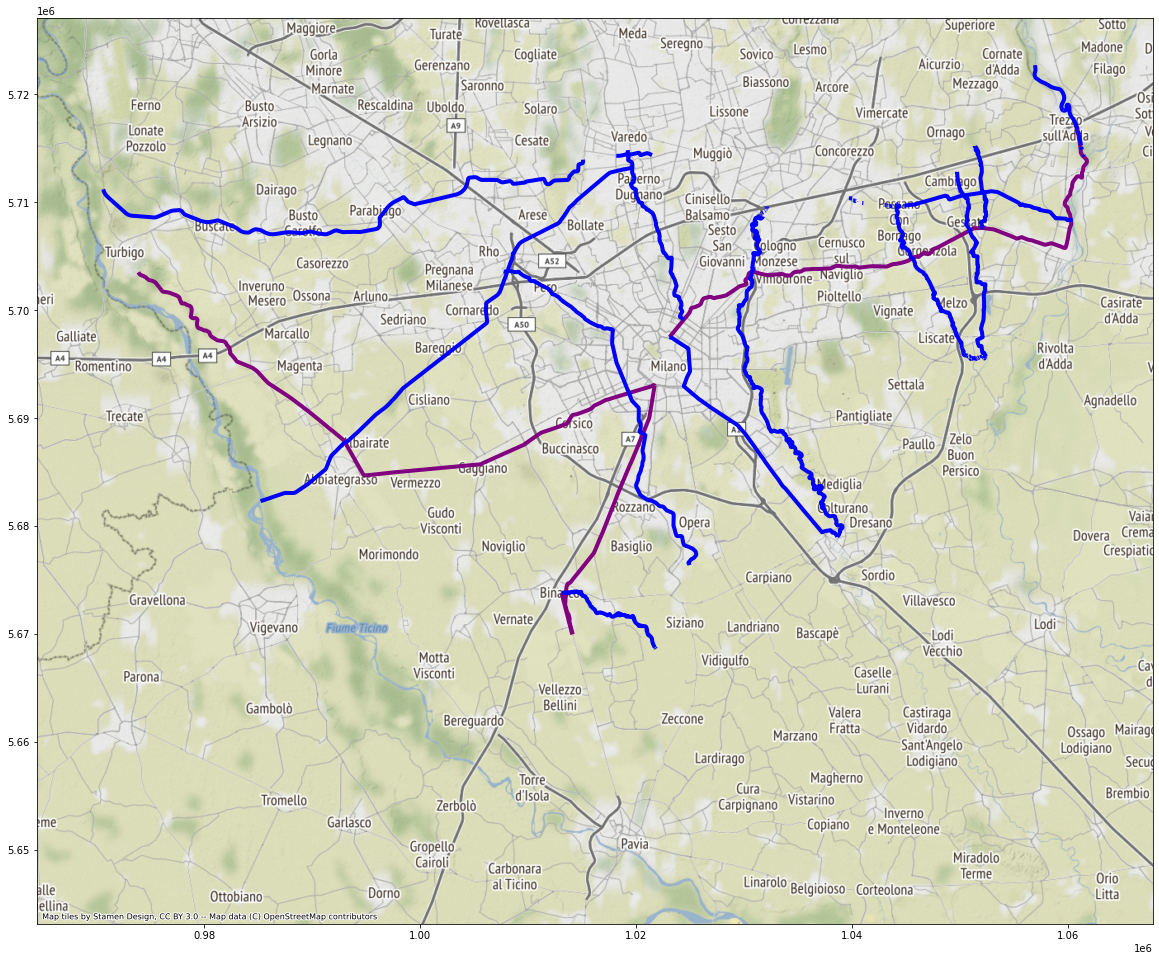

In [ ]:
ax = mi.to_crs(epsg=3857).plot(figsize=(20,20),facecolor="none")
navigli.to_crs(epsg=3857).plot(ax=ax, linewidth= 4, edgecolor= "purple")
fiu.to_crs(epsg=3857).plot(ax=ax, linewidth= 4, edgecolor= "b")
contextily.add_basemap(ax=ax)

Inserisci il nome di un comune: Bollate
i parchi ospitati all'interno di questo comune sono: 
 1     Scolmatore Piene Nord - Ovest (Canale)
3                       Garbogera (Torrente)
14                         Pudica (Torrente)
29                         Nirone (Torrente)
41                          Guisa (Torrente)
Name: NOME, dtype: object


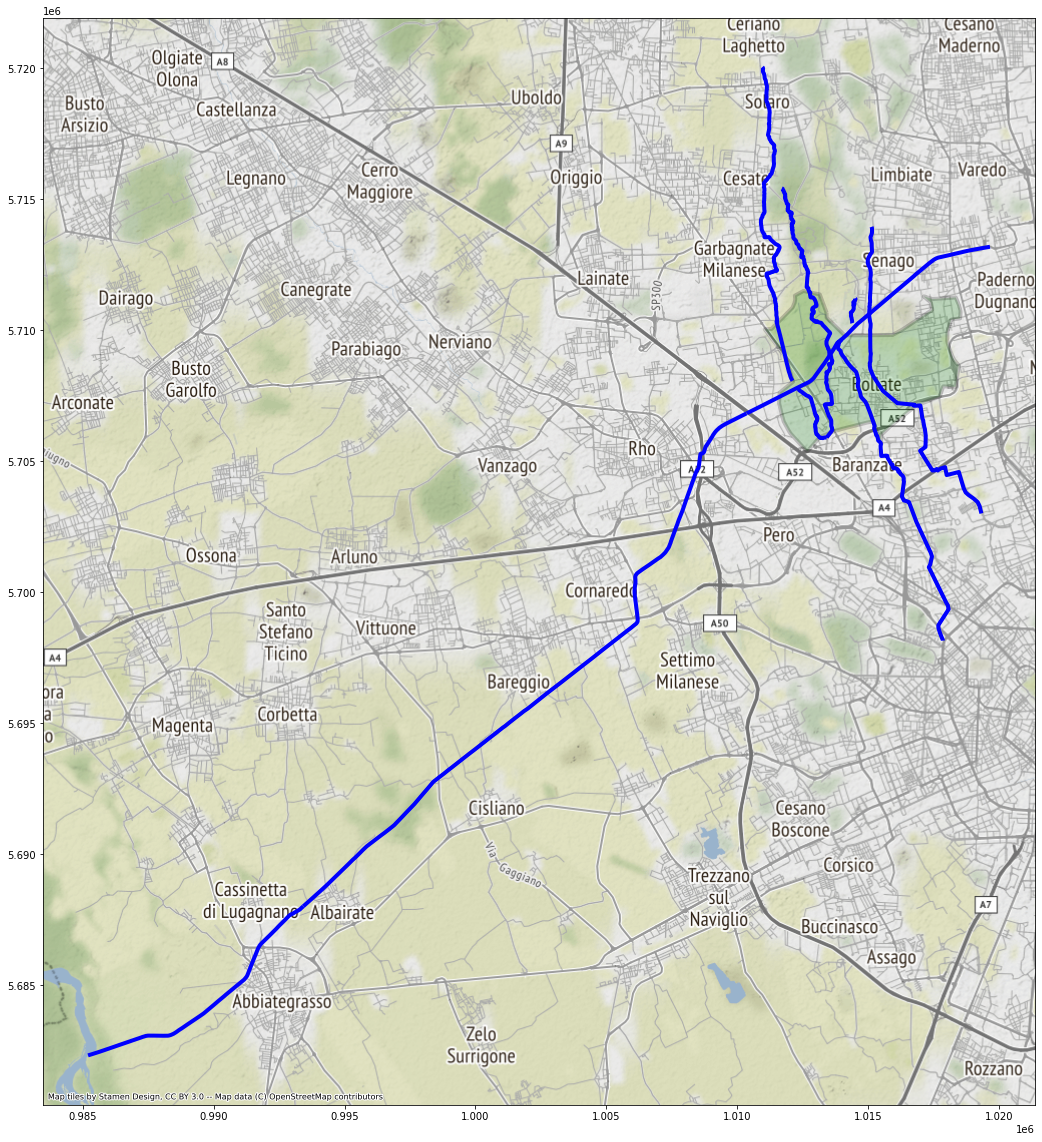

In [ ]:
nomeComu = input("Inserisci il nome di un comune: ")
comune = com[com["COMUNE"] == nomeComu]
squeezeCom = comune.geometry.squeeze()
corsi_milano =  corsi[corsi.intersects(squeezeCom)]
corsi_milano
print("i parchi ospitati all'interno di questo comune sono: \n", corsi_milano.NOME)
ax = comune.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "g",alpha = 0.2, edgecolor = "k", linewidth = 4)
corsi_milano.to_crs(epsg = 3857).plot(ax = ax ,linewidth=4, edgecolor = "b" )
contextily.add_basemap(ax=ax)